In [37]:
import os
import sys
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader

In [38]:
# Local dependencies - YOUR COMPUTER
path_to_SCRIPTS = os.getcwd() 


path_to_data = os.path.join(path_to_SCRIPTS, "DATA")
path_to_modules = os.path.join(path_to_SCRIPTS, "DEPENDENCIES")
if not path_to_modules in sys.path: sys.path.append(path_to_modules)
if not path_to_data in sys.path: sys.path.append(path_to_data)

from map_dependencies import *
from figure_dependencies import create_figure

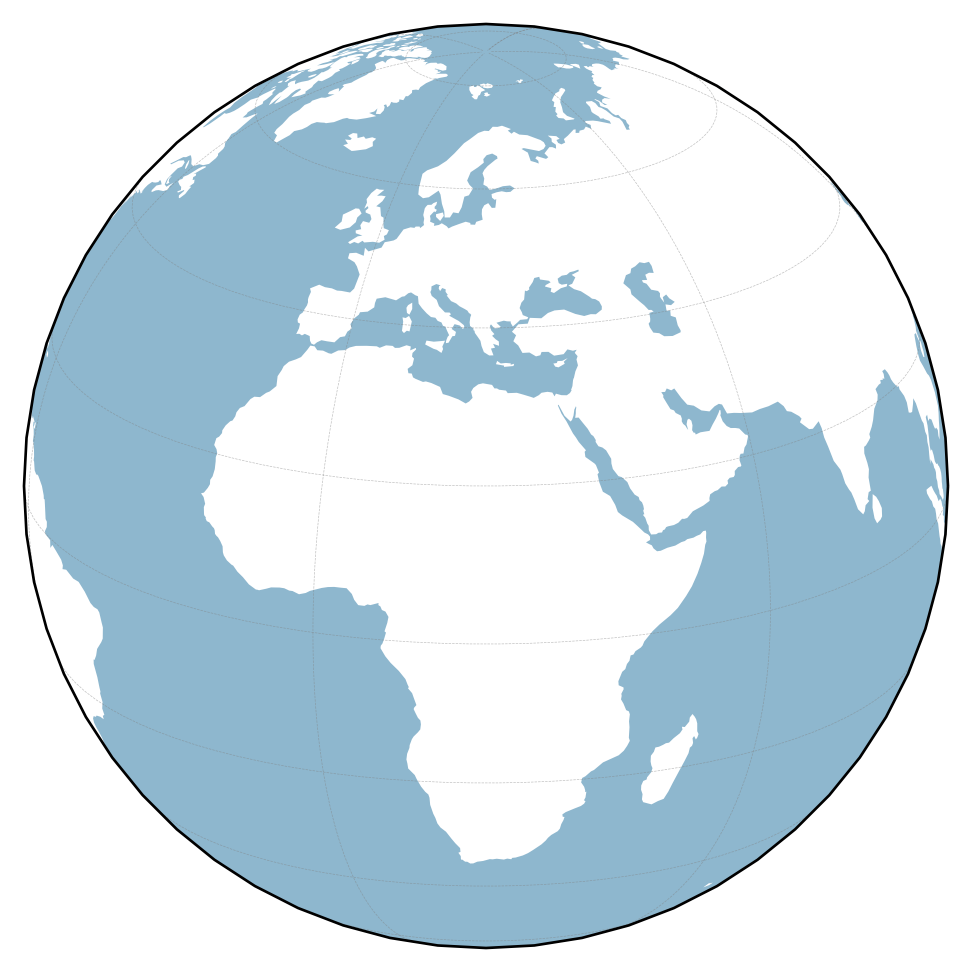

In [39]:
fig = plt.figure(figsize=(5,5), dpi=240 )    
ax = fig.add_subplot(projection=ccrs.Orthographic(central_longitude=22,
                                                  central_latitude=20)) 

#ax.add_feature(cf.COASTLINE, linewidth=0.5)
ax.add_feature(cf.OCEAN, facecolor='#8EB7CE')
ax.gridlines(linewidth=0.2, color='gray', linestyle='--', alpha=0.5)

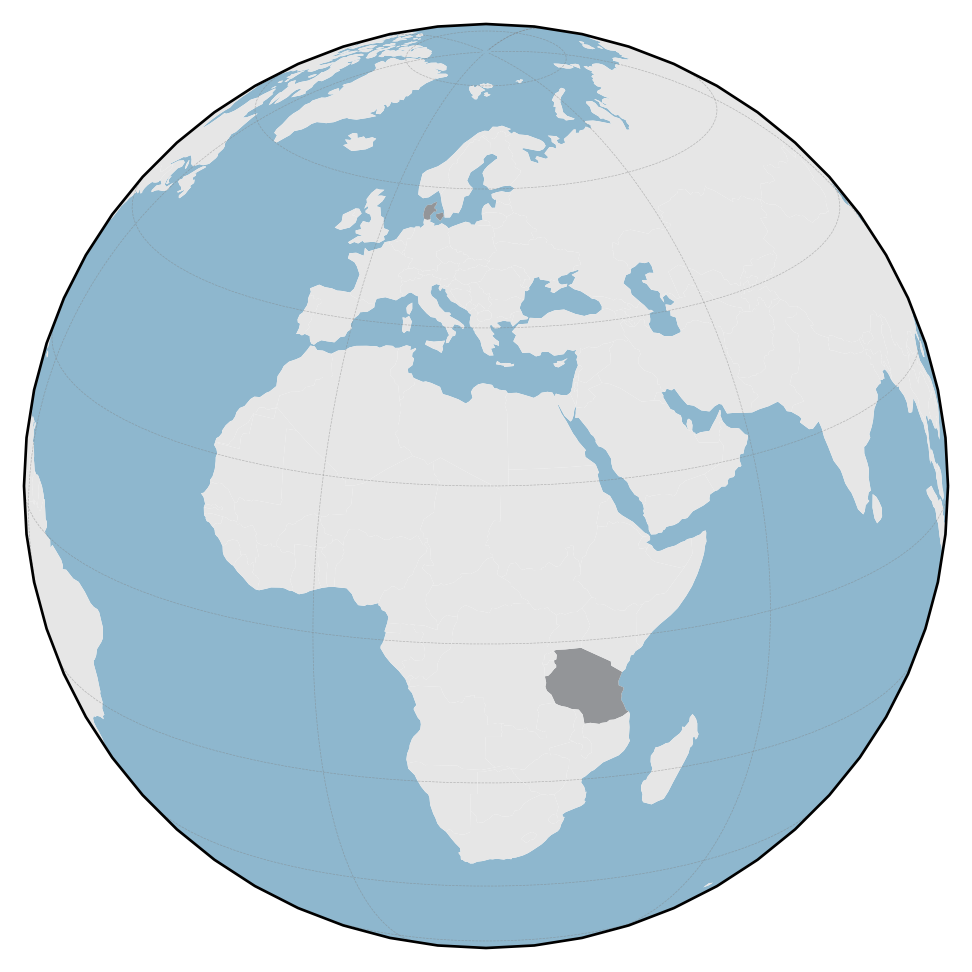

In [40]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['ADM0_A3_US'] in ['TZA', 'DNK']:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor="#939598", edgecolor='none',# linewidth=0.0,
                          label=country.attributes['ADM0_A3_US'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor="#E6E6E6", edgecolor='none',# linewidth=0.0,
                          label=country.attributes['ADM0_A3_US'])
        
fig